In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 8. Student Performance Prediction.csv to 8. Student Performance Prediction.csv


In [ ]:
import pandas as pd

df = pd.read_csv('8. Student Performance Prediction.csv')


First 5 rows of the dataset:
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196    

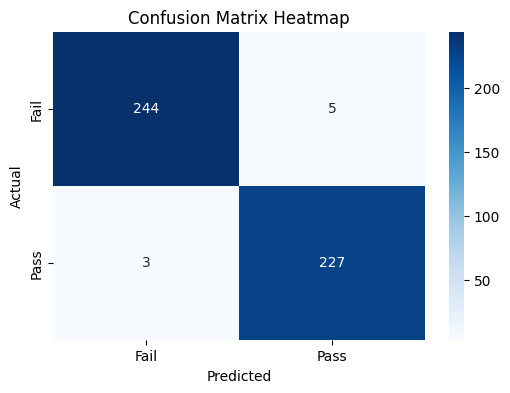

In [12]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

#load the CSV file
df = pd.read_csv('/content/8. Student Performance Prediction.csv')

#preview the dataset
print("First 5 rows of the dataset:")
print(df.head())

#data Preprocessing
#encode categorical features using LabelEncoder
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

#create the 'Result' column based on GPA
df['Result'] = np.where(df['GPA'] >= 2.0, 'Pass', 'Fail')

#define features (X) and target (y)
X = df.drop(['Result', 'GPA'], axis=1)  #dropping 'Result' and 'GPA' to make it harder to predict
y = df['Result']

#add some random noise to the features to confuse the model
np.random.seed(42)
noise = np.random.randn(X.shape[0], 3)  #adding 3 noisy features
X = np.concatenate([X, noise], axis=1)

#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train a Random Forest Classifier with reduced parameters
model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)  #lower number of trees and max depth
model.fit(X_train, y_train)

#make predictions on the test data
y_pred = model.predict(X_test)

#calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Pass')  #'Pass' is the positive class
recall = recall_score(y_test, y_pred, pos_label='Pass')

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

#generate and plot the confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred, labels=['Fail', 'Pass'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()
